In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/lithium/OUTPUT_sensitivity33.csv')
data.head()


Type  Year  Cathode Scenario  Location scenario  location of recycling   \
0     2  2020                 1                  2                       1   
1     1  2020                 1                  2                       1   
2     0  2020                 1                  2                       1   
3     2  2020                 1                  1                       1   
4     1  2020                 1                  1                       1   

   scenarios  Virgin material value ($)  Cost to recycle ($)  Profit ($)  
0         19                       4.98                 5.18       -0.20  
1         19                       5.52                 5.18        0.34  
2         19                       8.05                 7.52        0.53  
3         19                       4.98                 4.89        0.09  
4         19                       5.52                 4.89        0.63

In [3]:
X = data.drop('Profit ($)', axis=1)
y = data['Profit ($)']


print(X,y)



      Type  Year  Cathode Scenario  Location scenario  location of recycling   \
0        2  2020                 1                  2                       1   
1        1  2020                 1                  2                       1   
2        0  2020                 1                  2                       1   
3        2  2020                 1                  1                       1   
4        1  2020                 1                  1                       1   
...    ...   ...               ...                ...                     ...   
8581     2  2050                 1                  2                       2   
8582     2  2050                 1                  2                       2   
8583     2  2050                 1                  2                       2   
8584     2  2050                 1                  2                       2   
8585     2  2050                 1                  2                       2   

      scenarios  Virgin mat

Data Summary:
   Type  Year  Cathode Scenario  Location scenario  location of recycling   \
0     2  2020                 1                  2                       1   
1     1  2020                 1                  2                       1   
2     0  2020                 1                  2                       1   
3     2  2020                 1                  1                       1   
4     1  2020                 1                  1                       1   

   scenarios  Virgin material value ($)  Cost to recycle ($)  Profit ($)  
0         19                       4.98                 5.18       -0.20  
1         19                       5.52                 5.18        0.34  
2         19                       8.05                 7.52        0.53  
3         19                       4.98                 4.89        0.09  
4         19                       5.52                 4.89        0.63  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 

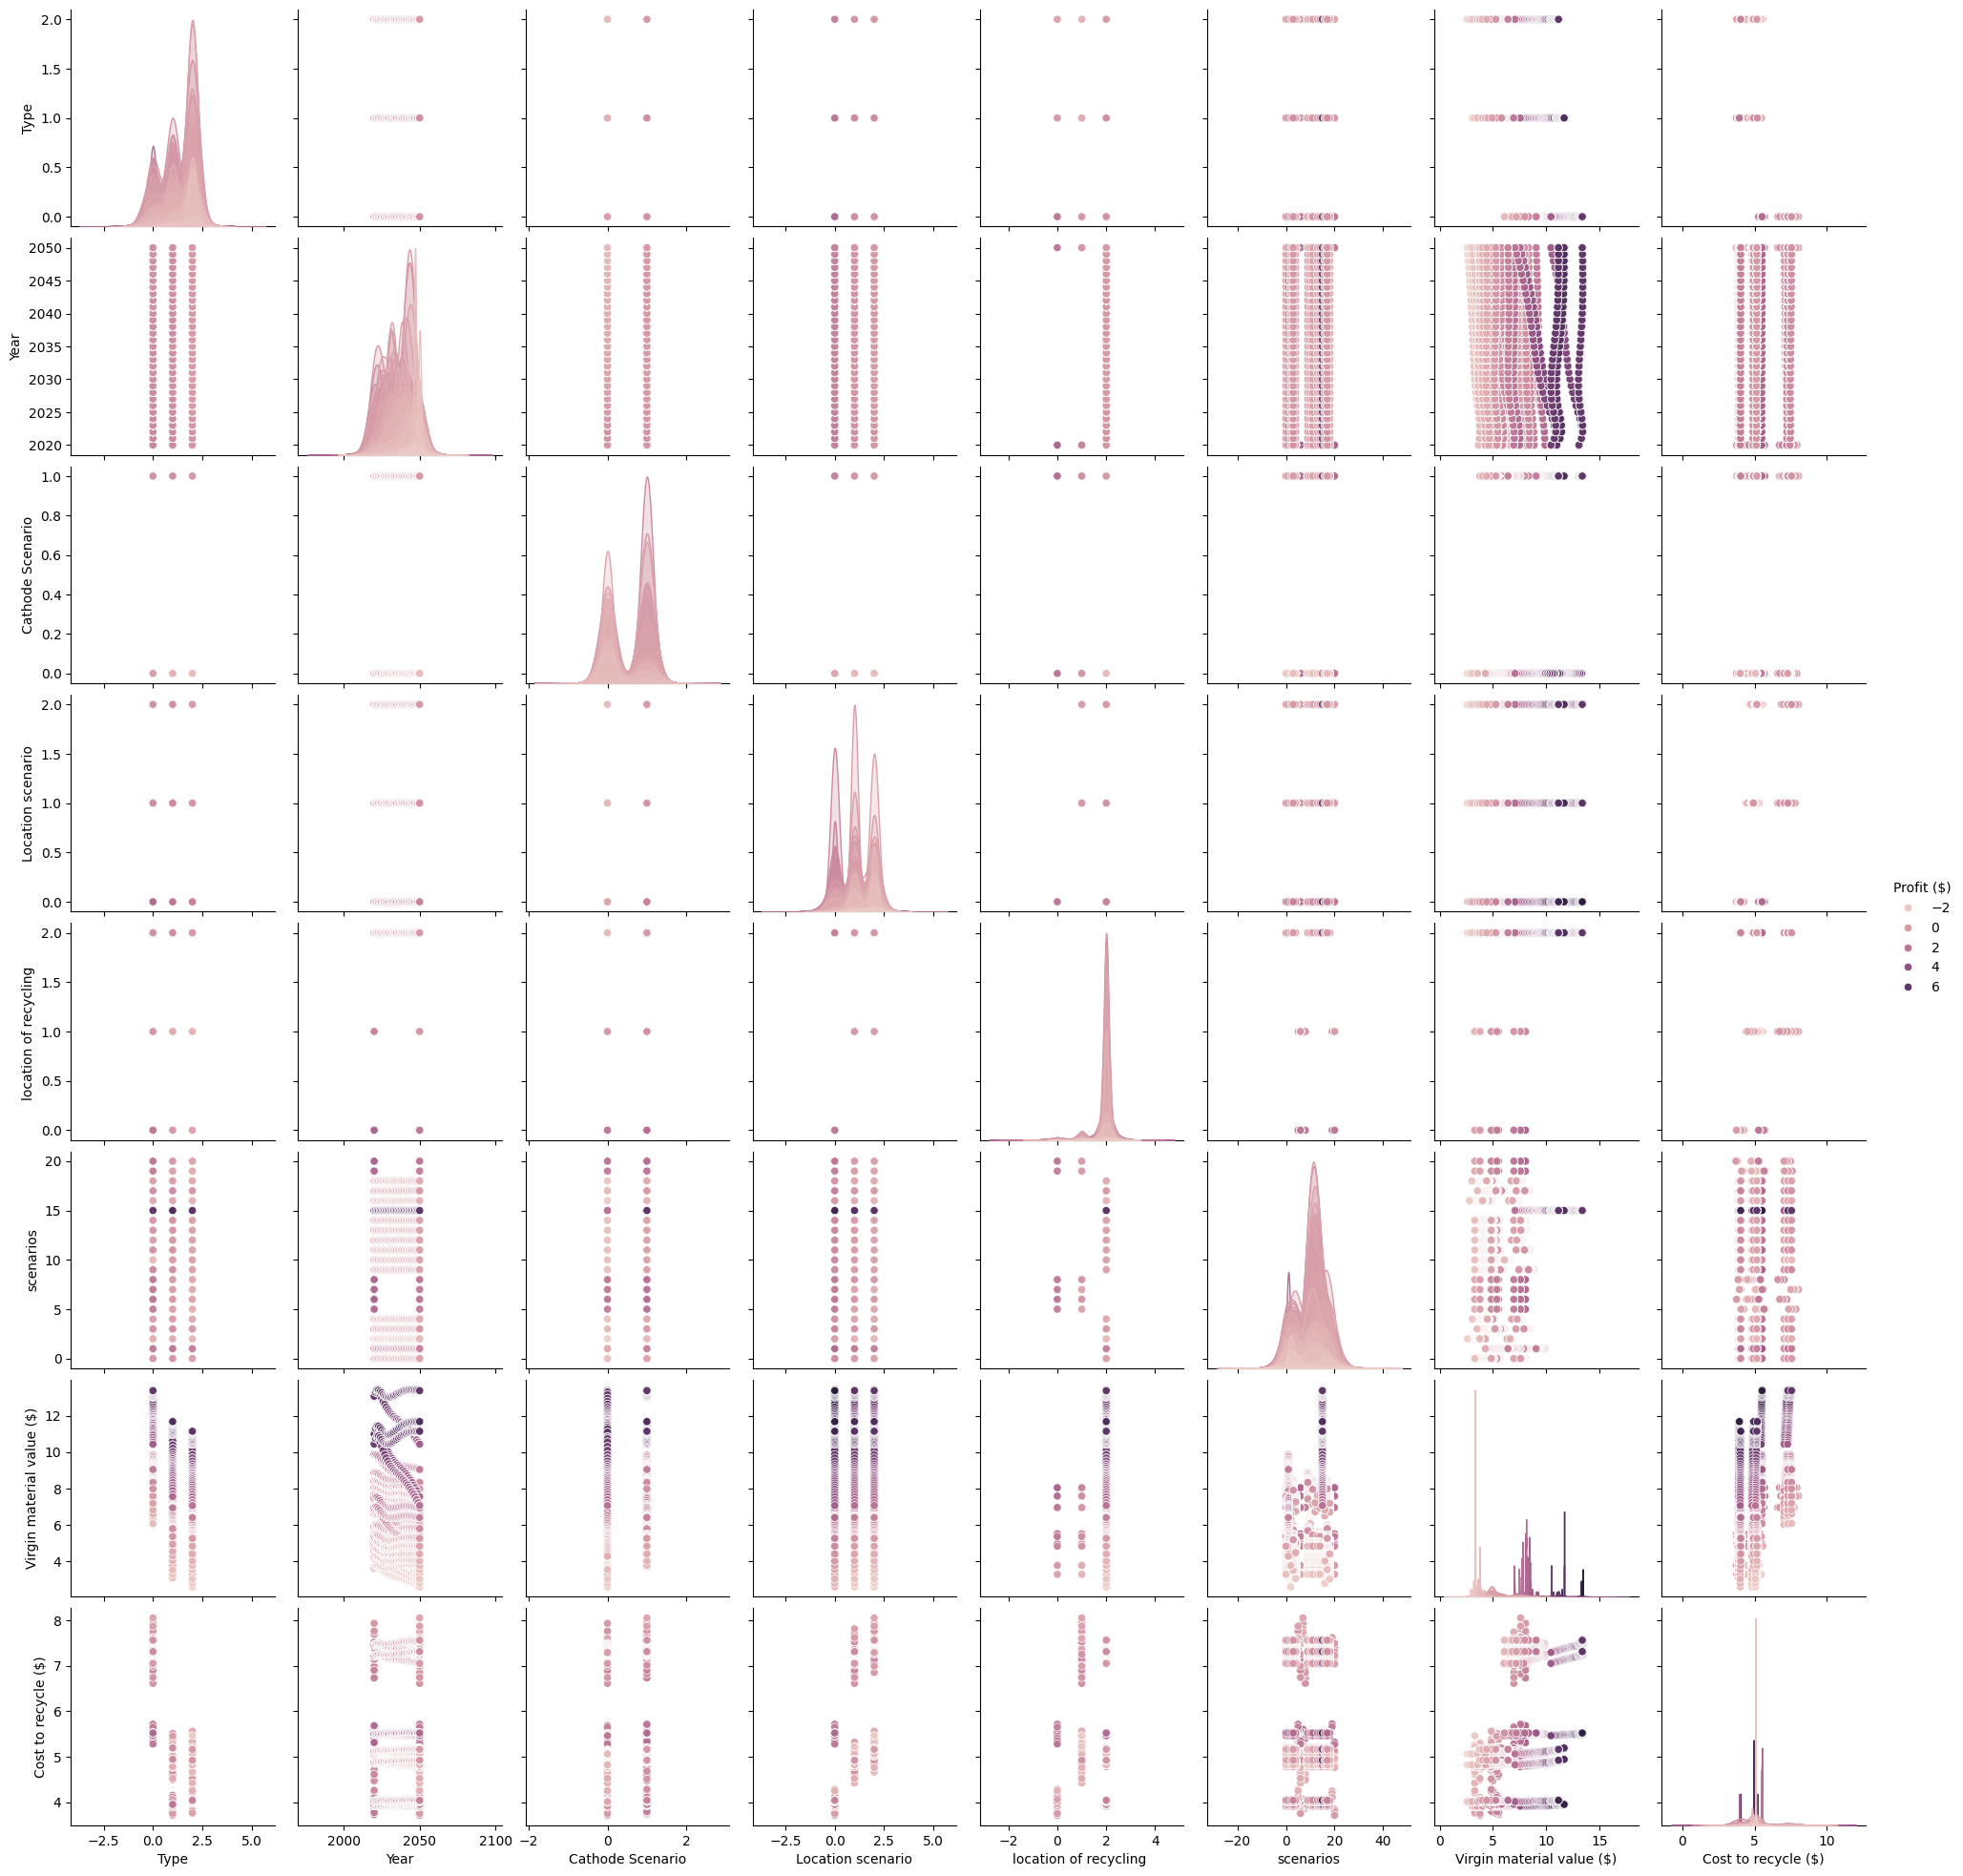

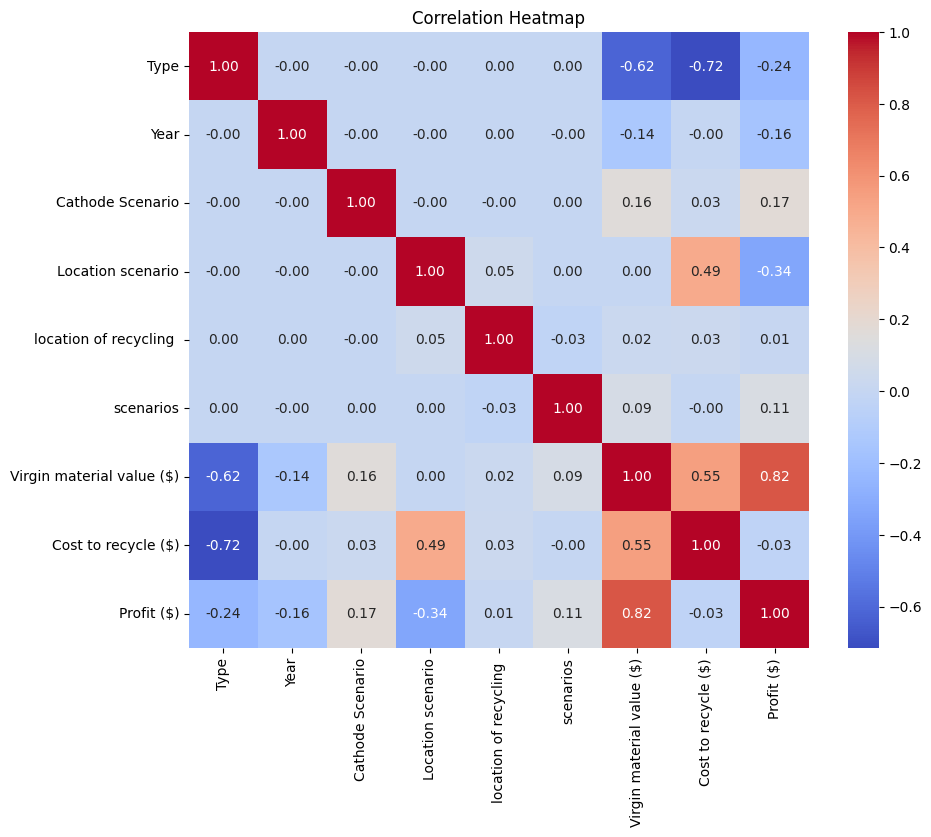

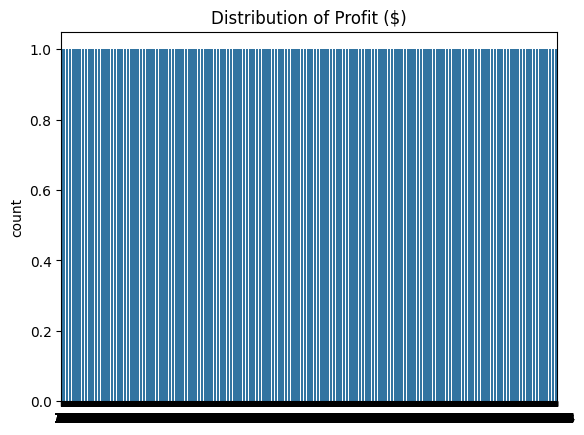

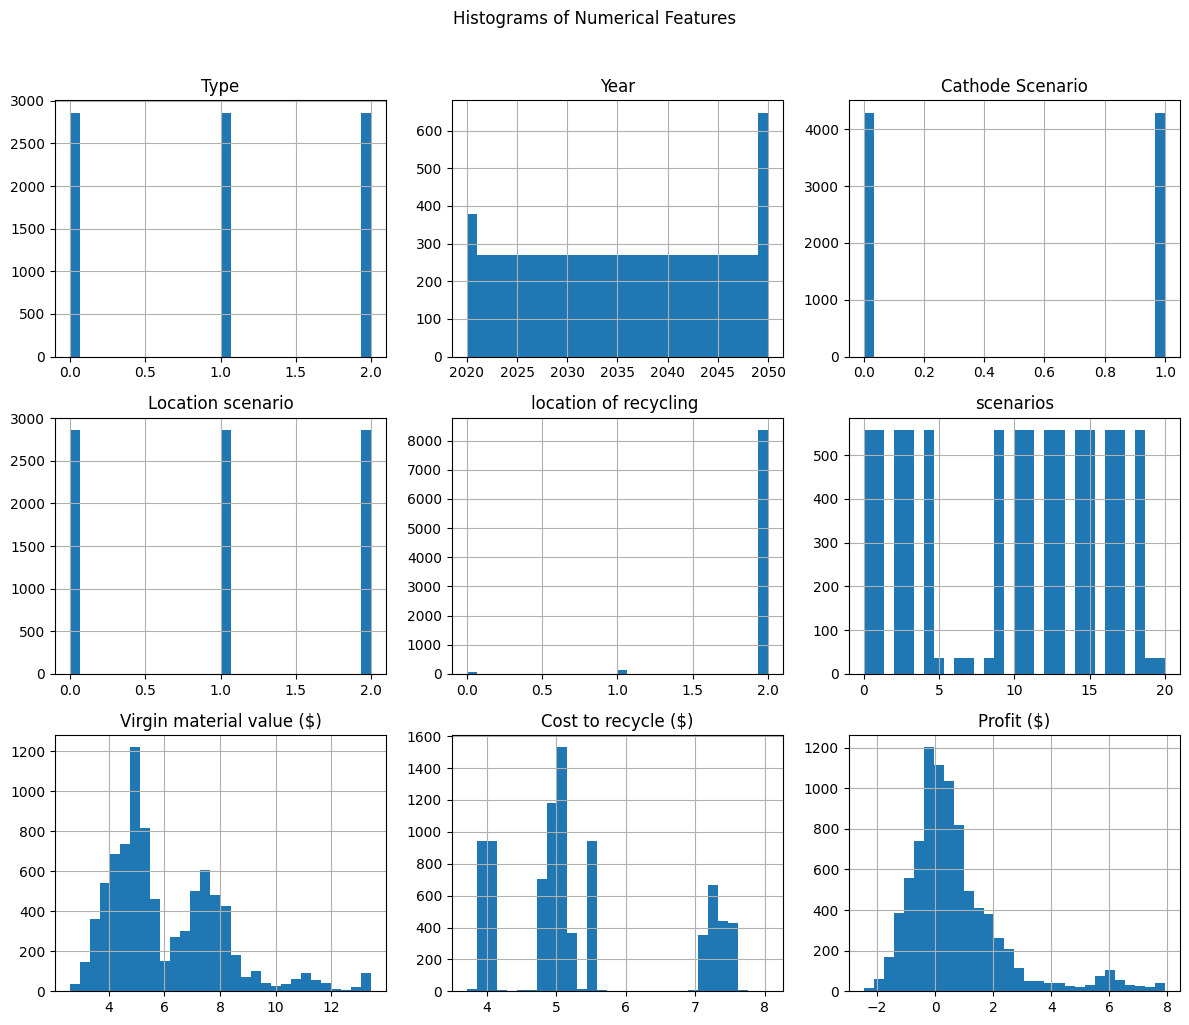

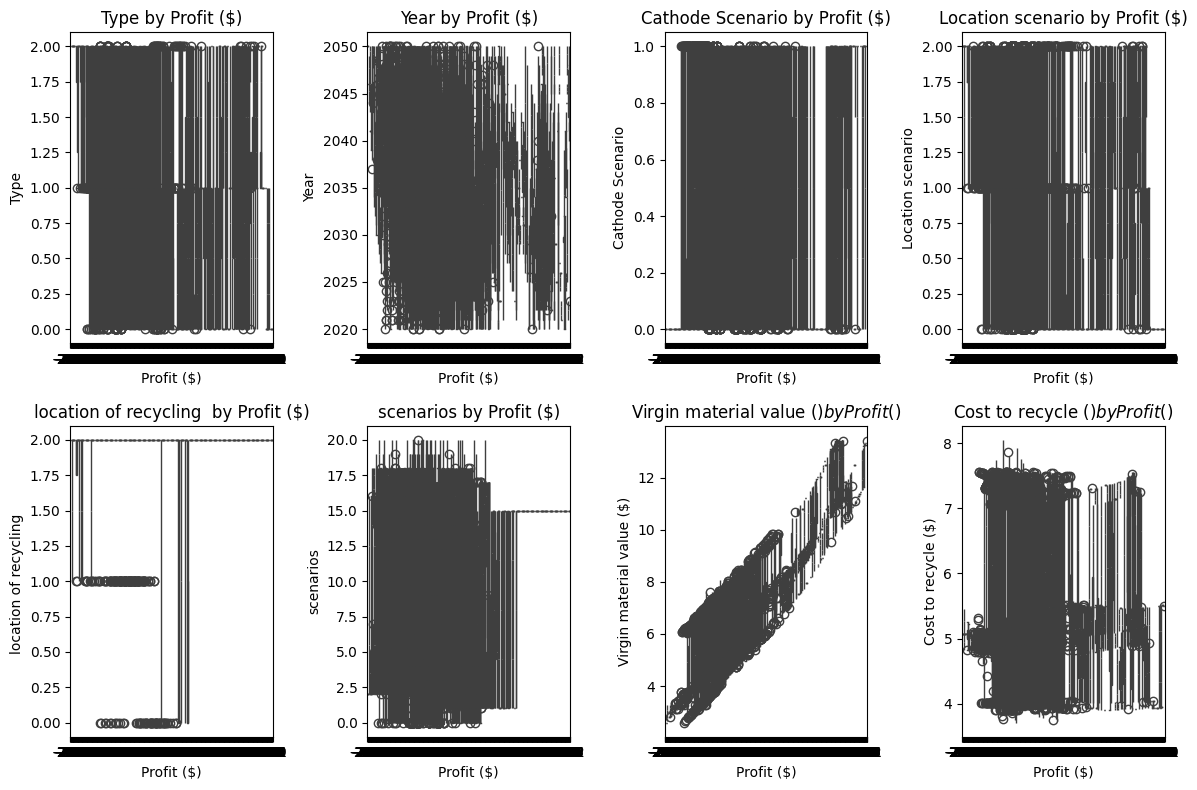

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

# Your existing code

# Step : Data Summary
print("Data Summary:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nData Statistics:")
print(data.describe())

# Step : Data Visualization and EDA
# Pairplot for visualizing relationships between features
sns.pairplot(data, hue='Profit ($)', diag_kind='kde')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of the target variable 'Outcome'
sns.countplot(data['Profit ($)'])
plt.title('Distribution of Profit ($)')
plt.show()

# Histograms of numerical features
data.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


# Boxplots for numerical features by Outcome
numerical_features = data.drop('Profit ($)', axis=1).columns
num_features = len(numerical_features)

# Adjust the subplot configuration based on the number of features
num_rows = (num_features // 4) + (num_features % 4 > 0)
num_cols = min(num_features, 4)

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='Profit ($)', y=feature, data=data)
    plt.title(f'{feature} by Profit ($)')
plt.tight_layout()
plt.show()


In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


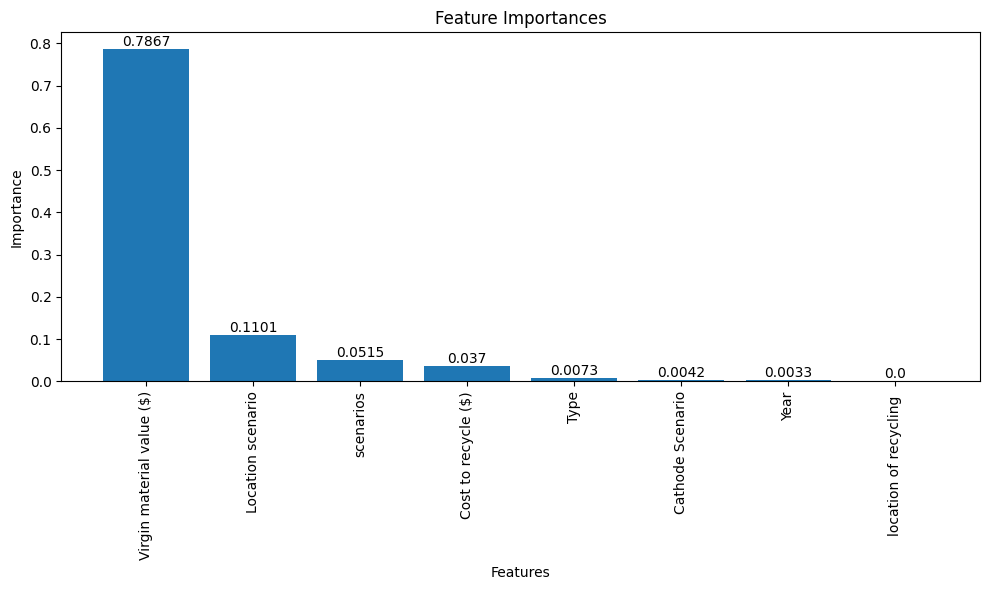

In [6]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


# Importance for Select the desired features by column
# Select the desired features
selected_features = ['Type', 'Year', 'Cathode Scenario', 'Location scenario', 'location of recycling ', 'scenarios', 'Virgin material value ($)', 'Cost to recycle ($)']

# Extract feature importances for selected features
importances = model.feature_importances_
feature_names = X.columns

selected_importances = []
for feature in selected_features:
    if feature in feature_names:
        feature_index = np.where(feature_names == feature)[0][0]
        selected_importances.append(importances[feature_index])
    else:
        selected_importances.append(0)  # Assign 0 importance if feature not found

# Create a DataFrame with selected feature names and importance scores
selected_feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': selected_importances})

# Sort the DataFrame by importance scores in descending order
selected_feature_importances = selected_feature_importances.sort_values('Importance', ascending=False)


# Plot the feature importances with values displayed inside the bars
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
bars = plt.bar(selected_feature_importances['Feature'], selected_feature_importances['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()



Cross-Validation RMSE Scores: [0.03954069 0.04299234 0.03816351 0.03789603 0.0350952 ]
Mean Cross-Validation RMSE: 0.03873755297809901


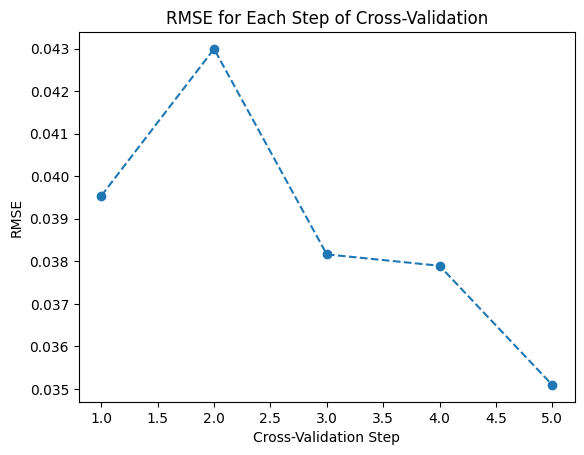

In [7]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

In [8]:
# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.001198655407450531
Mean Absolute Error: 0.015581199068684558


In [9]:
# Predict on the validation set
y_pred_val = rf_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 0.0012101872489082947
Validation Mean Absolute Error: 0.014947307132459913


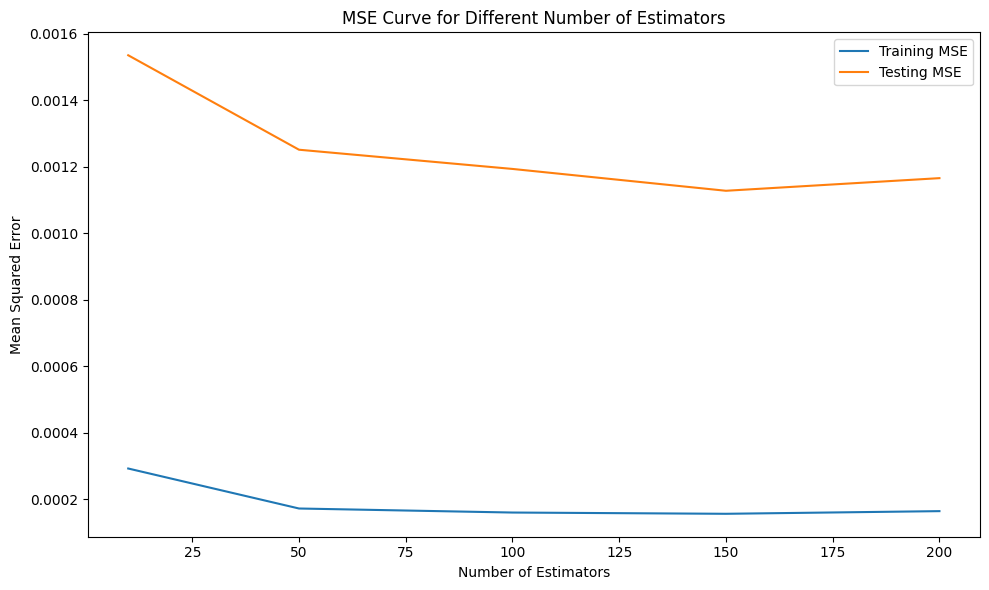

In [10]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []



for n in num_estimators:
    # Train the random forest regression model
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


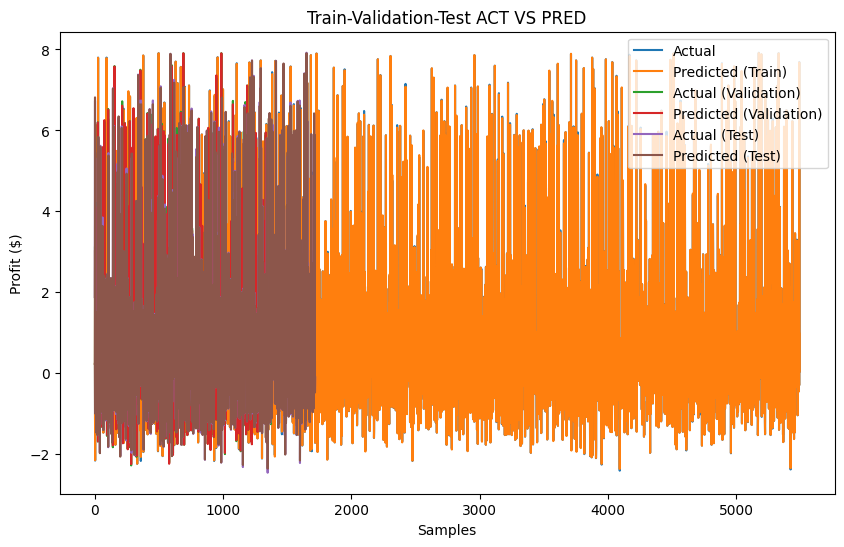

In [11]:
# Calculate the training set predictions
y_pred_train = rf_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Profit ($)')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


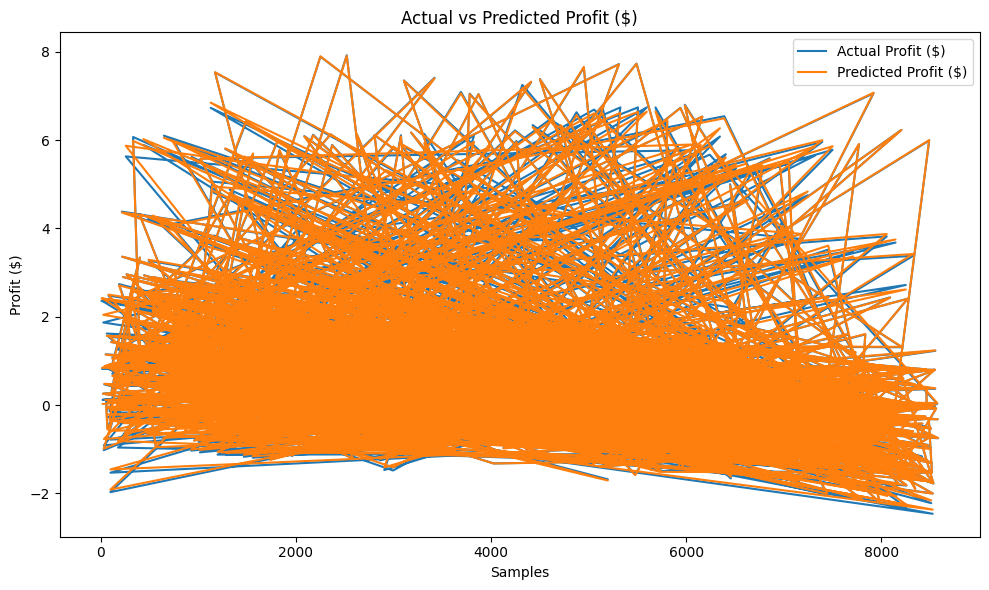

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Profit ($)': y_test, 'Predicted Profit ($)': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Profit ($)")
plt.plot(rent_comparison.index, rent_comparison['Actual Profit ($)'], label='Actual Profit ($)')
plt.plot(rent_comparison.index, rent_comparison['Predicted Profit ($)'], label='Predicted Profit ($)')
plt.xlabel("Samples")
plt.ylabel("Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()


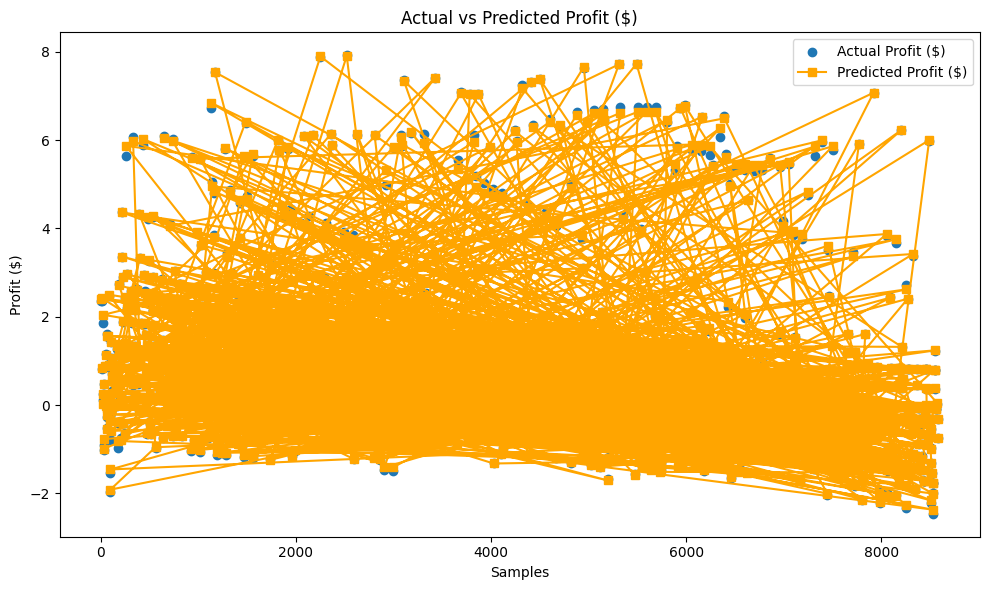

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Profit ($)': y_test, 'Predicted Profit ($)': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Profit ($)")
plt.scatter(rent_comparison.index, rent_comparison['Actual Profit ($)'], label='Actual Profit ($)', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Profit ($)'], label='Predicted Profit ($)', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)  # Import r2_score from sklearn.metrics

# Calculate RMSLE
rmsle = np.sqrt(np.mean(np.log1p(forest_pred + 1) - np.log1p(y_test + 1)) ** 2)

# Calculate MAPE
mask = y_test != 0  # Exclude instances where y_test is zero
mape = np.mean(np.abs((y_test[mask] - forest_pred[mask]) / y_test[mask])) * 100

print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Random Forest Regressor Model with 100 Estimators:
Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 3.57%


<ipython-input-14-7ae92a8368c0>:19: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(forest_pred + 1) - np.log1p(y_test + 1)) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators and other hyperparameters
num_estimators = 100  # You can change this to your desired number
max_depth = None  # Max depth of each tree, None means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
min_samples_split = 2  # The minimum number of samples required to split an internal node
min_samples_leaf = 1  # The minimum number of samples required to be at a leaf node
max_features = 'auto'  # The number of features to consider when looking for the best split
bootstrap = True  # Whether bootstrap samples are used when building trees

# Create and evaluate Random Forest Regressor with specified hyperparameters
forest_model = RandomForestRegressor(n_estimators=num_estimators,
                                     max_depth=max_depth,
                                     min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,
                                     max_features=max_features,
                                     bootstrap=bootstrap,
                                     random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)

# Calculate RMSLE
rmsle = np.sqrt(np.mean(np.log1p(forest_pred + 1) - np.log1p(y_test + 1)) ** 2)

# Calculate MAPE
mask = y_test != 0  # Exclude instances where y_test is zero
mape = np.mean(np.abs((y_test[mask] - forest_pred[mask]) / y_test[mask])) * 100

# Print evaluation metrics
print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators and Powerful Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



Random Forest Regressor Model with 100 Estimators and Powerful Hyperparameters:
Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 3.57%


<ipython-input-15-b52db228b506>:31: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(forest_pred + 1) - np.log1p(y_test + 1)) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Cross-Validation RMSE Scores: [0.29896932 0.28430353 0.29956297 0.29002604 0.27383594]
Mean Cross-Validation RMSE: 0.2893395596889653


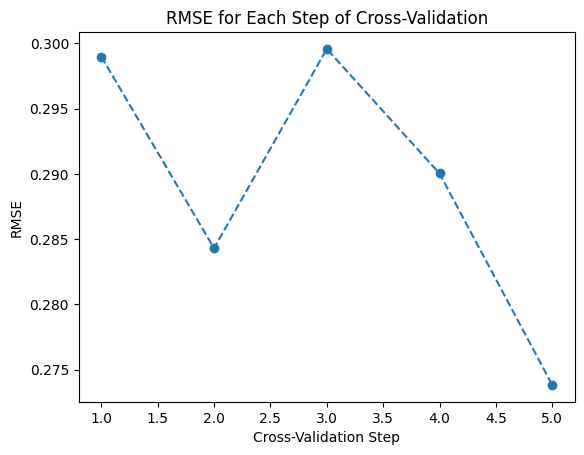

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(knn_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()



In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_test = knn_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.06359329220023283
Mean Absolute Error: 0.18696973224679858


In [18]:
# Predict on the validation set
y_pred_val = knn_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 0.06069282096069868
Validation Mean Absolute Error: 0.1822707423580786


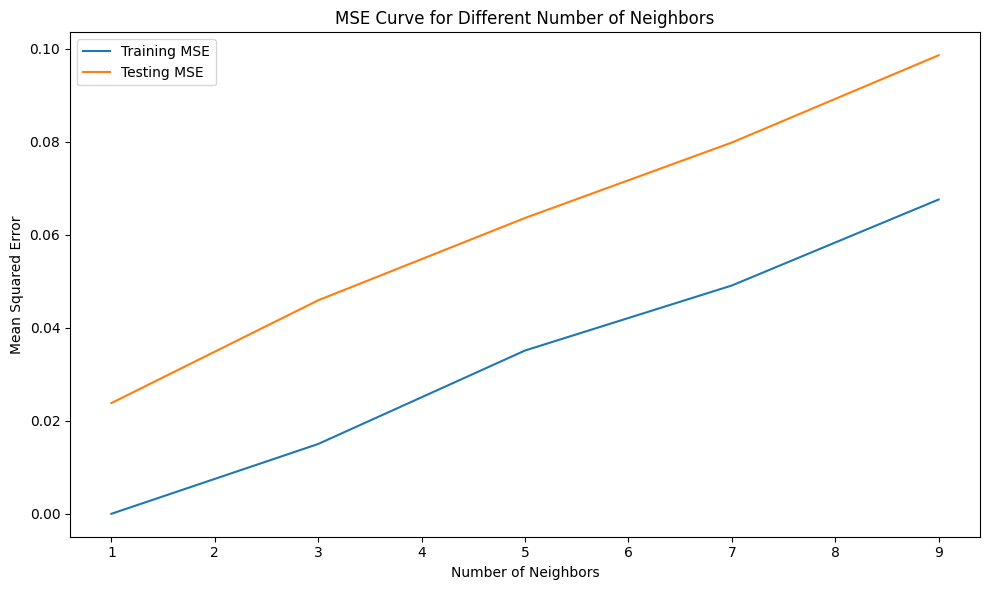

In [19]:
from sklearn.neighbors import KNeighborsRegressor

num_neighbors = [1, 3, 5, 7, 9]
train_errors = []
test_errors = []

for k in num_neighbors:
    # Train the KNN regression model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_neighbors, train_errors, label='Training MSE')
plt.plot(num_neighbors, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


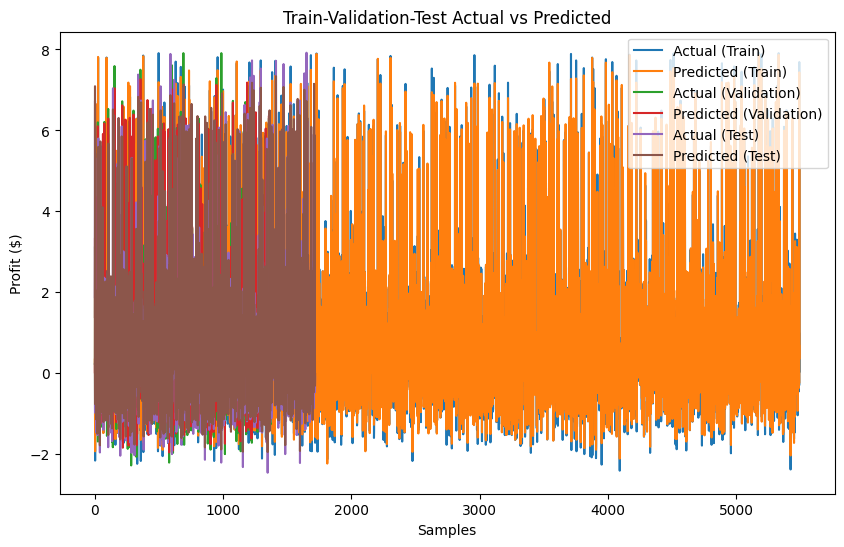

In [20]:
# Calculate the training set predictions
y_pred_train = knn_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = knn_regressor.predict(X_val)

# Calculate the test set predictions
y_pred_test = knn_regressor.predict(X_test)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Profit ($)')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


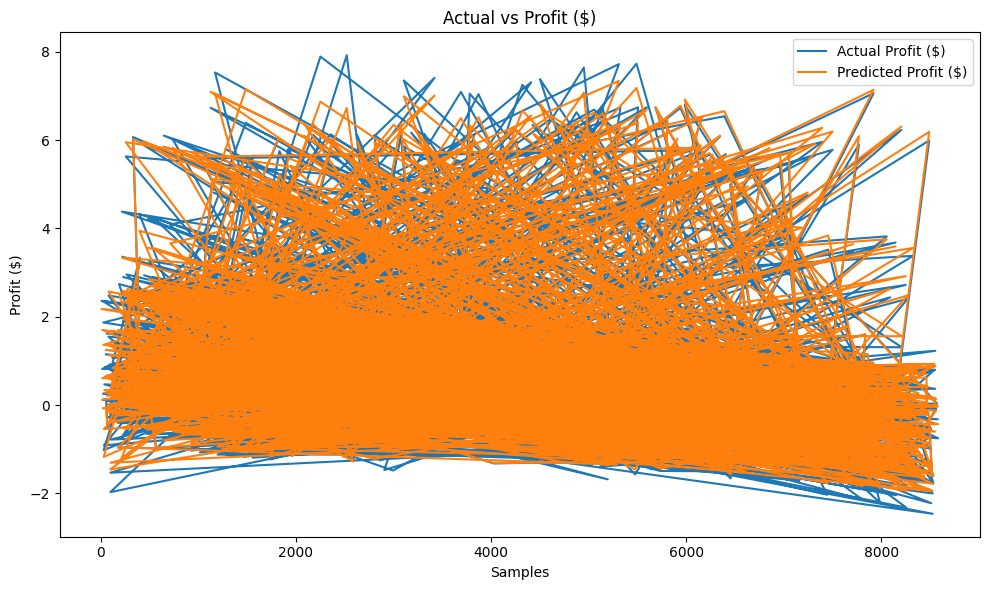

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Profit ($)': y_test, 'Predicted Profit ($)': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Profit ($)")
plt.plot(rent_comparison.index, rent_comparison['Actual Profit ($)'], label='Actual Profit ($)')
plt.plot(rent_comparison.index, rent_comparison['Predicted Profit ($)'], label='Predicted Profit ($)')
plt.xlabel("Samples")
plt.ylabel("Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()


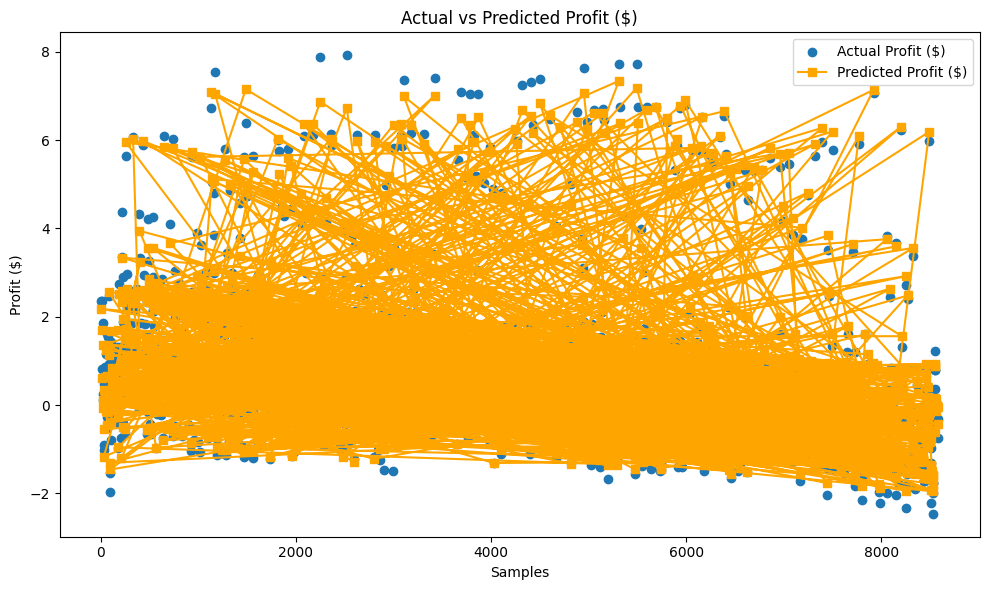

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Profit ($)': y_test, 'Predicted Profit ($)': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Profit ($)")
plt.scatter(rent_comparison.index, rent_comparison['Actual Profit ($)'], label='Actual Profit ($)', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Profit ($)'], label='Predicted Profit ($)', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of neighbors
num_neighbors = 5  # You can change this to your desired number

# Create and evaluate KNN Regressor with a specific number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=num_neighbors)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)  # Import r2_score from sklearn.metrics

# Calculate RMSLE
rmsle_mask = (forest_pred > 0) & (y_test > 0)  # Exclude instances where either prediction or actual value is zero
rmsle = np.sqrt(np.mean((np.log1p(forest_pred[rmsle_mask]) - np.log1p(y_test[rmsle_mask])) ** 2))

# Calculate MAPE
mape_mask = y_test != 0  # Exclude instances where y_test is zero
mape = np.mean(np.abs((y_test[mape_mask] - forest_pred[mape_mask]) / y_test[mape_mask])) * 100


print(f"\nKNN Regressor Model with {num_neighbors} Neighbors:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regressor Model with 5 Neighbors:
Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.25
R-squared (R2): 0.98
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 3.57%


Cross-Validation RMSE Scores: [0.78118522 0.88487561 1.57976445 1.08144728 0.82640592]
Mean Cross-Validation RMSE: 1.0307356963175835


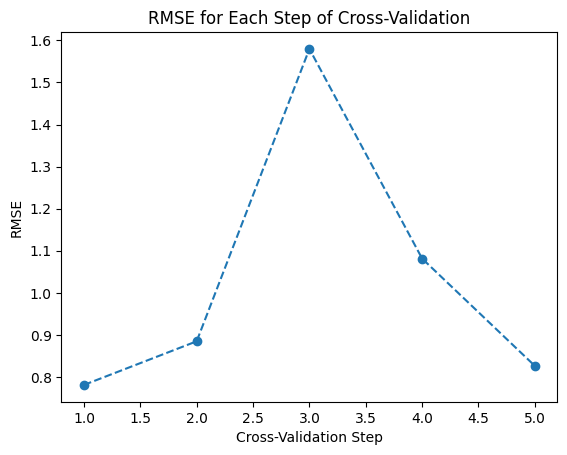

In [24]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the SVR model
svr_regressor = SVR(kernel='linear')  # Specify the kernel type, e.g., linear, poly, rbf, sigmoid
svr_regressor.fit(X_train, y_train)

# Perform cross-validation for RMSE
cv_scores = cross_val_score(svr_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set using the SVR model
y_pred_test_svr = svr_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse_svr = mean_squared_error(y_test, y_pred_test_svr)
mae_svr = mean_absolute_error(y_test, y_pred_test_svr)

# Print the evaluation metrics
print("SVR Mean Squared Error:", mse_svr)
print("SVR Mean Absolute Error:", mae_svr)


SVR Mean Squared Error: 1.1819543310190361
SVR Mean Absolute Error: 0.8926129103289587


In [26]:
# Predict on the validation set using the Linear Regression model
y_pred_val = svr_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 1.2795471148743092
Validation Mean Absolute Error: 0.9386535918471605


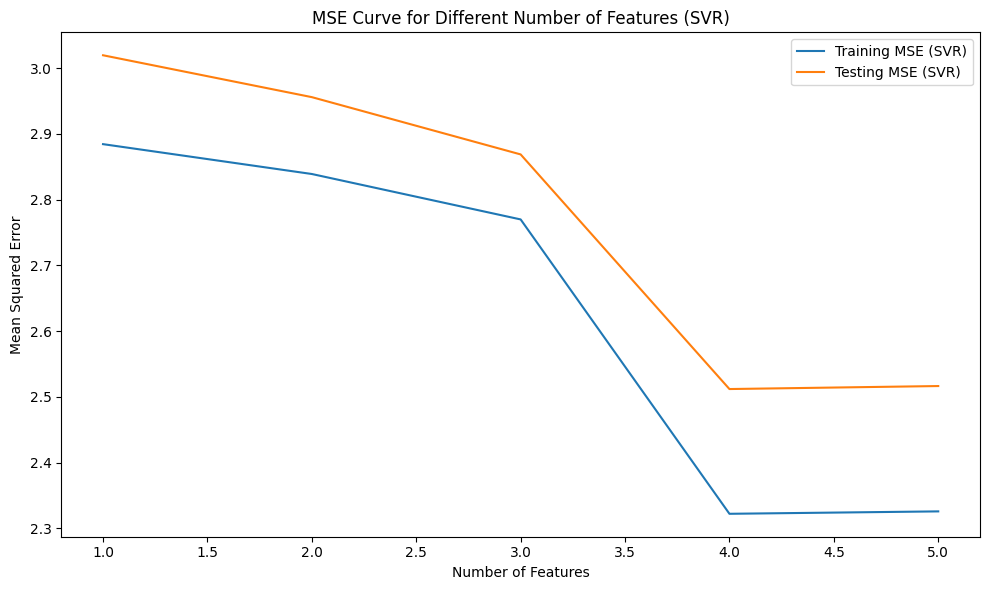

In [27]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors_svr = []
test_errors_svr = []

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the SVR model
    svr_model = SVR(kernel='linear')  # or other kernel types like 'poly', 'rbf', or 'sigmoid'
    svr_model.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred_svr = svr_model.predict(X_train_subset)
    y_test_pred_svr = svr_model.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error_svr = mean_squared_error(y_train, y_train_pred_svr)
    test_error_svr = mean_squared_error(y_test, y_test_pred_svr)

    # Append the errors to the lists
    train_errors_svr.append(train_error_svr)
    test_errors_svr.append(test_error_svr)

# Plot the MSE curve for SVR
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors_svr, label='Training MSE (SVR)')
plt.plot(num_features, test_errors_svr, label='Testing MSE (SVR)')
plt.title('MSE Curve for Different Number of Features (SVR)')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


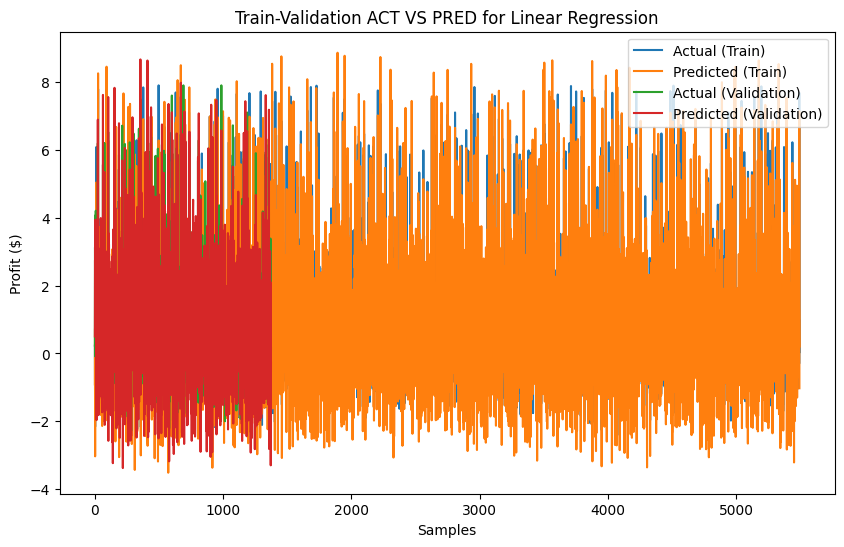

In [28]:
# Calculate the training set predictions for Linear Regression
y_pred_train_lr = svr_regressor.predict(X_train)

# Calculate the training set mean squared error for Linear Regression
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)

# Calculate the validation set predictions for Linear Regression
y_pred_val_lr = svr_regressor.predict(X_val)

# Plot the train-validation loss curves for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_lr)), y_pred_train_lr, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_lr)), y_pred_val_lr, label='Predicted (Validation)')
plt.xlabel('Samples')
plt.ylabel('Profit ($)')
plt.title('Train-Validation ACT VS PRED for Linear Regression')
plt.legend()
plt.show()


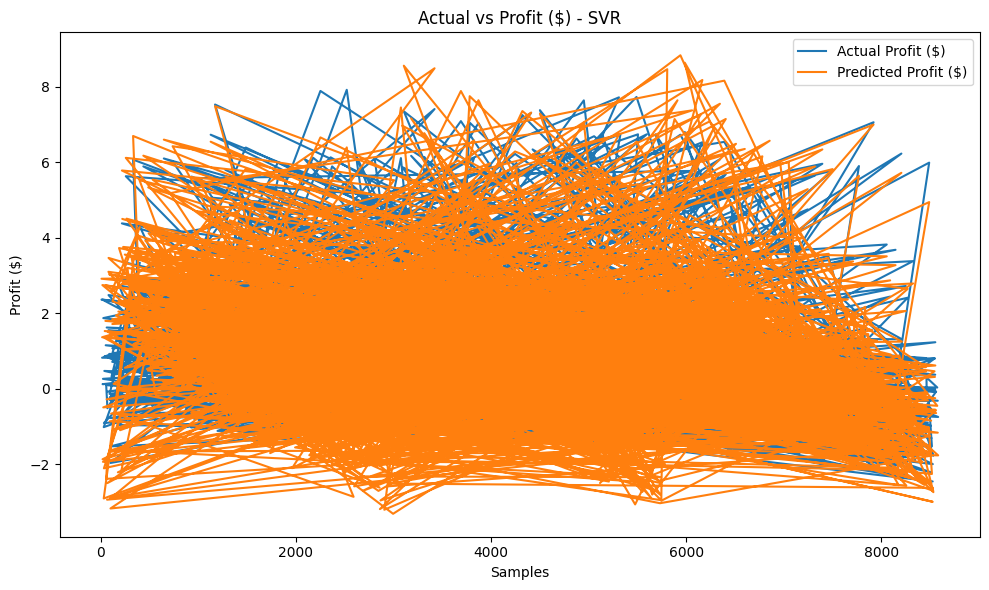

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Train the SVR model
svr_regressor = SVR(kernel='linear')  # Specify the kernel type, e.g., linear, poly, rbf, sigmoid
svr_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_regressor.predict(X_test)

# Create a DataFrame with actual and predicted profit values
profit_comparison_svr = pd.DataFrame({'Actual Profit ($)': y_test, 'Predicted Profit ($)': y_pred_svr})

# Plot the actual versus predicted profit values for SVR
plt.figure(figsize=(10, 6))
plt.title("Actual vs Profit ($) - SVR")
plt.plot(profit_comparison_svr.index, profit_comparison_svr['Actual Profit ($)'], label='Actual Profit ($)')
plt.plot(profit_comparison_svr.index, profit_comparison_svr['Predicted Profit ($)'], label='Predicted Profit ($)')
plt.xlabel("Samples")
plt.ylabel("Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()


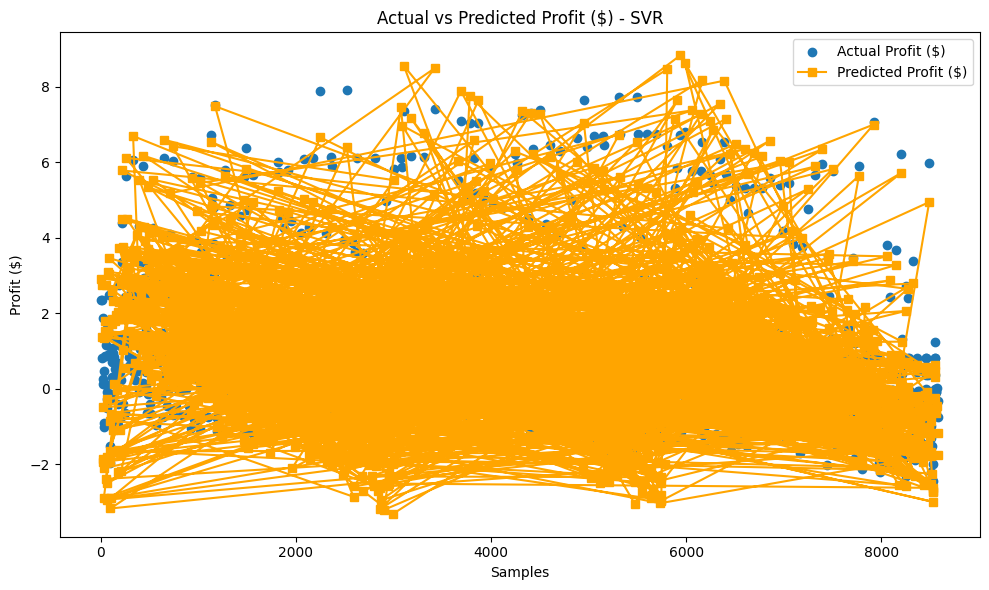

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Train the SVR model
svr_regressor = SVR(kernel='linear')  # You can choose the appropriate kernel type, e.g., 'linear', 'poly', 'rbf', 'sigmoid'
svr_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_regressor.predict(X_test)

# Create a DataFrame with actual and predicted profit values
profit_comparison_svr = pd.DataFrame({'Actual Profit ($)': y_test, 'Predicted Profit ($)': y_pred_svr})

# Plot the actual versus predicted profit values for SVR
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Profit ($) - SVR")
plt.scatter(profit_comparison_svr.index, profit_comparison_svr['Actual Profit ($)'], label='Actual Profit ($)', marker='o')
plt.plot(profit_comparison_svr.index, profit_comparison_svr['Predicted Profit ($)'], label='Predicted Profit ($)', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and train SVR model
svr_regressor = SVR(kernel='linear')  # You can choose the appropriate kernel type, e.g., 'linear', 'poly', 'rbf', 'sigmoid'
svr_regressor.fit(X_train, y_train)
svr_pred = svr_regressor.predict(X_test)

# Evaluate SVR model
mae_svr = mean_absolute_error(y_test, svr_pred)
mse_svr = mean_squared_error(y_test, svr_pred)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, svr_pred)

# Calculate RMSLE
rmsle_mask_svr = (svr_pred > 0) & (y_test > 0)  # Exclude instances where either prediction or actual value is zero
rmsle_svr = np.sqrt(np.mean((np.log1p(svr_pred[rmsle_mask_svr]) - np.log1p(y_test[rmsle_mask_svr])) ** 2))

# Calculate MAPE
mape_mask_svr = y_test != 0  # Exclude instances where y_test is zero
mape_svr = np.mean(np.abs((y_test[mape_mask_svr] - svr_pred[mape_mask_svr]) / y_test[mape_mask_svr])) * 100

print("\nSVR Model:")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"R-squared (R2): {r2_svr:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_svr:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_svr:.2f}%")



SVR Model:
Mean Absolute Error (MAE): 0.89
Mean Squared Error (MSE): 1.18
Root Mean Squared Error (RMSE): 1.09
R-squared (R2): 0.61
Root Mean Squared Logarithmic Error (RMSLE): 0.43
Mean Absolute Percentage Error (MAPE): 328.88%


Cross-Validation RMSE Scores: [0.13605823 0.1463284  0.13787195 0.15015543 0.14168529]
Mean Cross-Validation RMSE: 0.14241986101438875


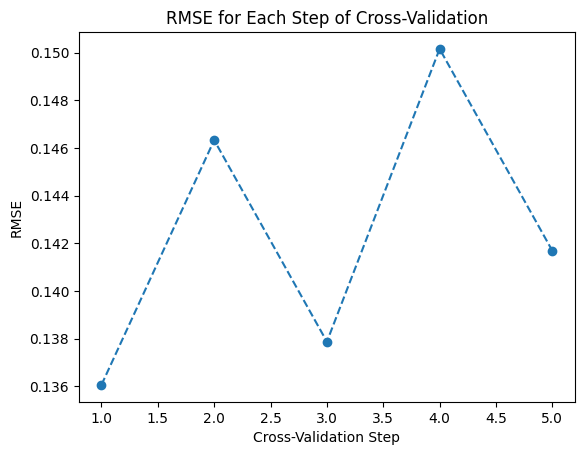

In [32]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the Lasso Regression model
lasso_regressor = Lasso(alpha=0.1)  # You can adjust the regularization parameter alpha as needed
lasso_regressor.fit(X_train, y_train)

# Perform cross-validation for RMSE
cv_scores = cross_val_score(lasso_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set using the Lasso Regression model
y_pred_test_lasso = lasso_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse_lasso = mean_squared_error(y_test, y_pred_test_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_test_lasso)

# Print the evaluation metrics
print("Lasso Regression Mean Squared Error:", mse_lasso)
print("Lasso Regression Mean Absolute Error:", mae_lasso)


Lasso Regression Mean Squared Error: 0.02023836381517385
Lasso Regression Mean Absolute Error: 0.10896976722054967


In [34]:
# Predict on the validation set using the Lasso Regression model
y_pred_val_lasso = lasso_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val_lasso = mean_squared_error(y_val, y_pred_val_lasso)
mae_val_lasso = mean_absolute_error(y_val, y_pred_val_lasso)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error (Lasso Regression):", mse_val_lasso)
print("Validation Mean Absolute Error (Lasso Regression):", mae_val_lasso)


Validation Mean Squared Error (Lasso Regression): 0.017899732736251894
Validation Mean Absolute Error (Lasso Regression): 0.10491507966674594


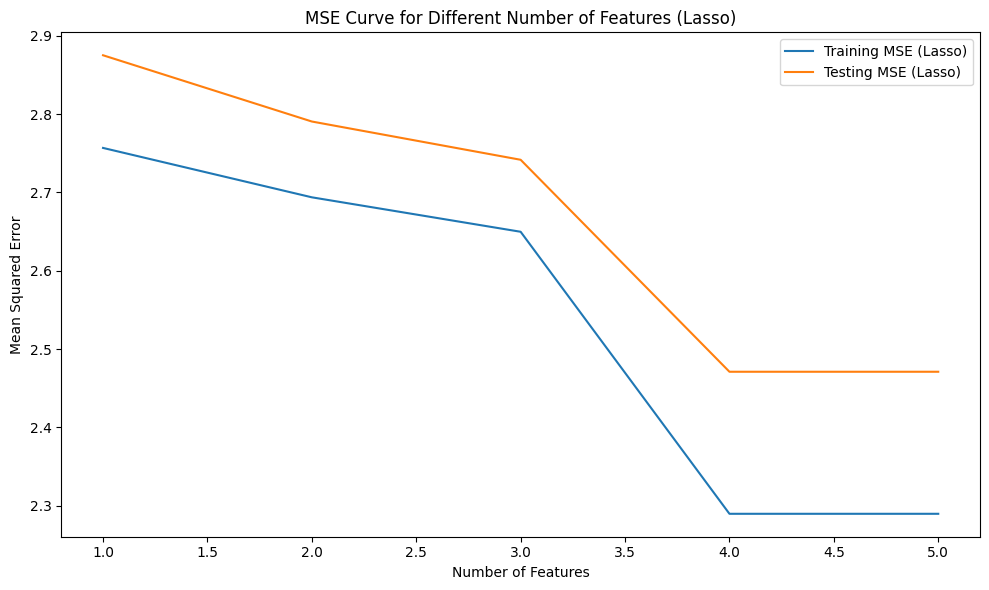

In [36]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors_lasso = []
test_errors_lasso = []

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the Lasso Regression model
    lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization parameter alpha as needed
    lasso_model.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred_lasso = lasso_model.predict(X_train_subset)
    y_test_pred_lasso = lasso_model.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error_lasso = mean_squared_error(y_train, y_train_pred_lasso)
    test_error_lasso = mean_squared_error(y_test, y_test_pred_lasso)

    # Append the errors to the lists
    train_errors_lasso.append(train_error_lasso)
    test_errors_lasso.append(test_error_lasso)

# Plot the MSE curve for Lasso Regression
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors_lasso, label='Training MSE (Lasso)')
plt.plot(num_features, test_errors_lasso, label='Testing MSE (Lasso)')
plt.title('MSE Curve for Different Number of Features (Lasso)')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


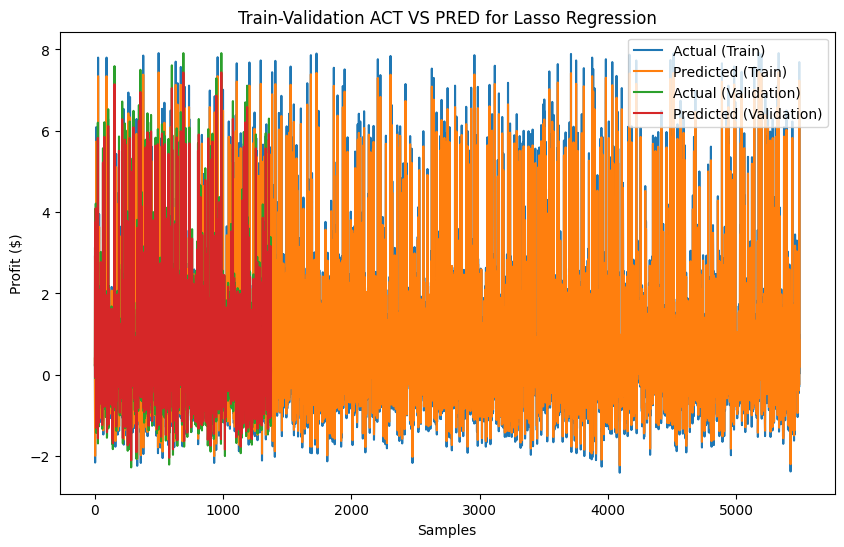

In [37]:
# Calculate the training set predictions for Lasso Regression
y_pred_train_lasso = lasso_regressor.predict(X_train)

# Calculate the training set mean squared error for Lasso Regression
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)

# Calculate the validation set predictions for Lasso Regression
y_pred_val_lasso = lasso_regressor.predict(X_val)

# Plot the train-validation loss curves for Lasso Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_lasso)), y_pred_train_lasso, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_lasso)), y_pred_val_lasso, label='Predicted (Validation)')
plt.xlabel('Samples')
plt.ylabel('Profit ($)')
plt.title('Train-Validation ACT VS PRED for Lasso Regression')
plt.legend()
plt.show()


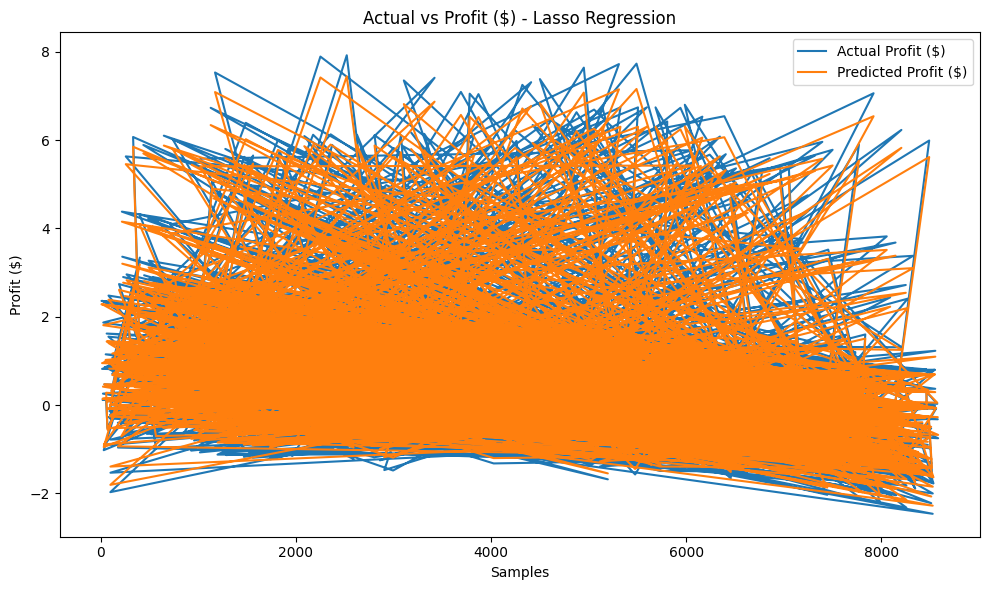

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Train the Lasso Regression model
lasso_regressor = Lasso(alpha=0.1)  # You can adjust the regularization parameter alpha as needed
lasso_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_regressor.predict(X_test)

# Create a DataFrame with actual and predicted profit values
profit_comparison_lasso = pd.DataFrame({'Actual Profit ($)': y_test, 'Predicted Profit ($)': y_pred_lasso})

# Plot the actual versus predicted profit values for Lasso Regression
plt.figure(figsize=(10, 6))
plt.title("Actual vs Profit ($) - Lasso Regression")
plt.plot(profit_comparison_lasso.index, profit_comparison_lasso['Actual Profit ($)'], label='Actual Profit ($)')
plt.plot(profit_comparison_lasso.index, profit_comparison_lasso['Predicted Profit ($)'], label='Predicted Profit ($)')
plt.xlabel("Samples")
plt.ylabel("Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()


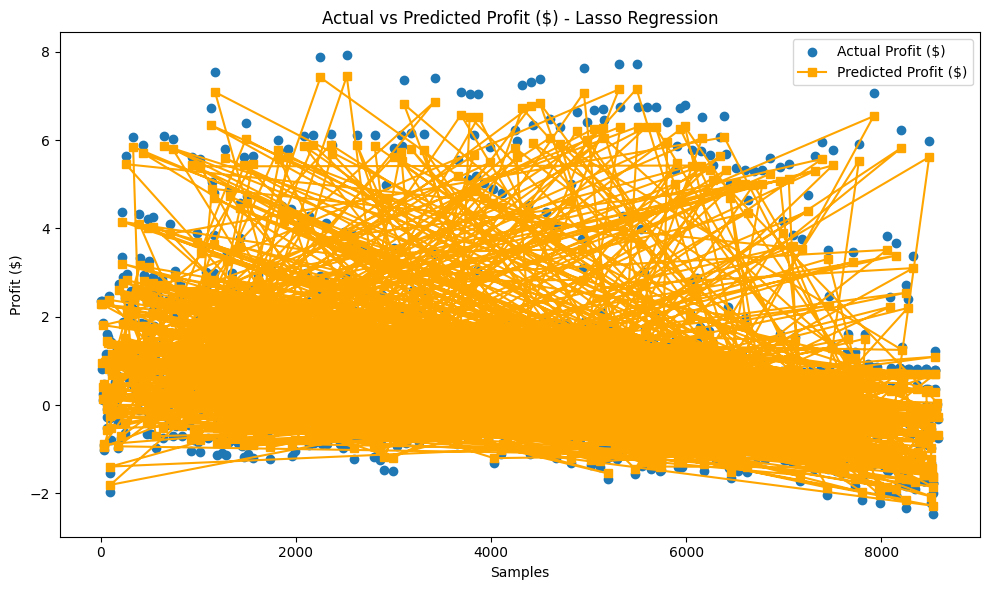

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Train the Lasso Regression model
lasso_regressor = Lasso(alpha=0.1)  # You can adjust the regularization parameter alpha as needed
lasso_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_regressor.predict(X_test)

# Create a DataFrame with actual and predicted profit values
profit_comparison_lasso = pd.DataFrame({'Actual Profit ($)': y_test, 'Predicted Profit ($)': y_pred_lasso})

# Plot the actual versus predicted profit values for Lasso Regression
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Profit ($) - Lasso Regression")
plt.scatter(profit_comparison_lasso.index, profit_comparison_lasso['Actual Profit ($)'], label='Actual Profit ($)', marker='o')
plt.plot(profit_comparison_lasso.index, profit_comparison_lasso['Predicted Profit ($)'], label='Predicted Profit ($)', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
from sklearn.linear_model import Lasso

# Create and train Lasso Regression model
lasso_regressor = Lasso(alpha=0.1)  # You can adjust the regularization parameter alpha as needed
lasso_regressor.fit(X_train, y_train)
lasso_pred = lasso_regressor.predict(X_test)

# Evaluate Lasso Regression model
mae_lasso = mean_absolute_error(y_test, lasso_pred)
mse_lasso = mean_squared_error(y_test, lasso_pred)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, lasso_pred)

# Calculate RMSLE
rmsle_mask_lasso = (lasso_pred > 0) & (y_test > 0)  # Exclude instances where either prediction or actual value is zero
rmsle_lasso = np.sqrt(np.mean((np.log1p(lasso_pred[rmsle_mask_lasso]) - np.log1p(y_test[rmsle_mask_lasso])) ** 2))

# Calculate MAPE
mape_mask_lasso = y_test != 0  # Exclude instances where y_test is zero
mape_lasso = np.mean(np.abs((y_test[mape_mask_lasso] - lasso_pred[mape_mask_lasso]) / y_test[mape_mask_lasso])) * 100

print("\nLasso Regression Model:")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R-squared (R2): {r2_lasso:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_lasso:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lasso:.2f}%")



Lasso Regression Model:
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14
R-squared (R2): 0.99
Root Mean Squared Logarithmic Error (RMSLE): 0.06
Mean Absolute Percentage Error (MAPE): 29.36%


Cross-Validation RMSE Scores: [0.02990379 0.03253491 0.02296119 0.0222051  0.02090947]
Mean Cross-Validation RMSE: 0.025702894843754785


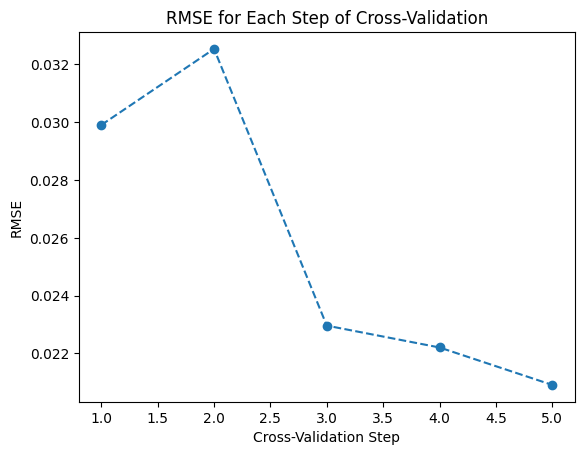

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the Extra Trees Regression model
extra_trees_regressor = ExtraTreesRegressor(n_estimators=100)  # You can adjust hyperparameters as needed
extra_trees_regressor.fit(X_train, y_train)

# Perform cross-validation for RMSE
cv_scores = cross_val_score(extra_trees_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set using the Extra Trees Regression model
y_pred_test_et = extra_trees_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse_et = mean_squared_error(y_test, y_pred_test_et)
mae_et = mean_absolute_error(y_test, y_pred_test_et)

# Print the evaluation metrics
print("Extra Trees Regression Mean Squared Error:", mse_et)
print("Extra Trees Regression Mean Absolute Error:", mae_et)


Extra Trees Regression Mean Squared Error: 0.0004956243538998912
Extra Trees Regression Mean Absolute Error: 0.007844121071012936


In [52]:
# Predict on the validation set using the Extra Trees Regression model
y_pred_val_et = extra_trees_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val_et = mean_squared_error(y_val, y_pred_val_et)
mae_val_et = mean_absolute_error(y_val, y_pred_val_et)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error (Extra Trees Regression):", mse_val_et)
print("Validation Mean Absolute Error (Extra Trees Regression):", mae_val_et)


Validation Mean Squared Error (Extra Trees Regression): 0.000374013901018924
Validation Mean Absolute Error (Extra Trees Regression): 0.007397525473071341


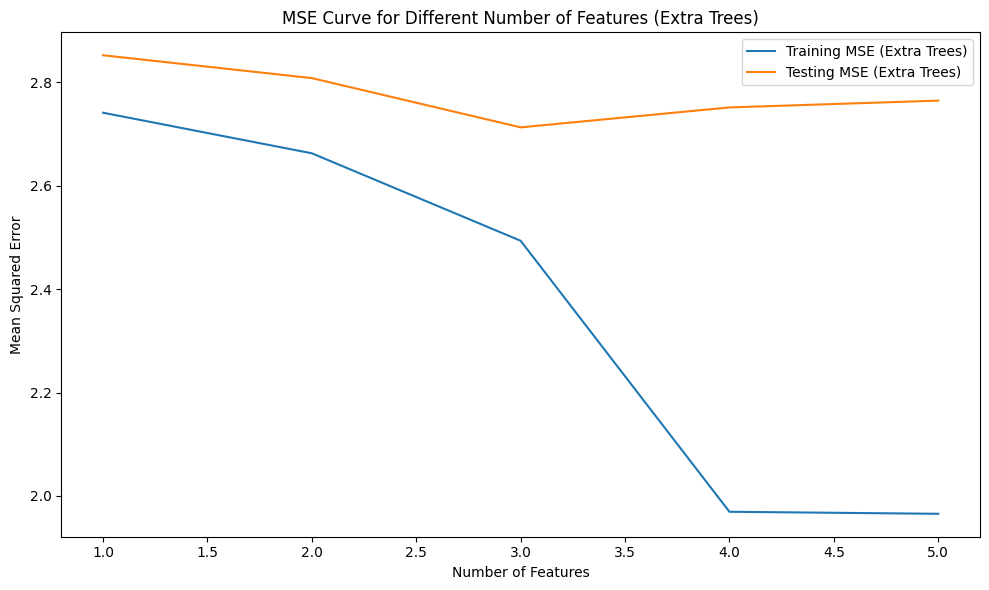

In [53]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors_et = []
test_errors_et = []

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the Extra Trees Regression model
    et_model = ExtraTreesRegressor(n_estimators=100)  # You can adjust hyperparameters as needed
    et_model.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred_et = et_model.predict(X_train_subset)
    y_test_pred_et = et_model.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error_et = mean_squared_error(y_train, y_train_pred_et)
    test_error_et = mean_squared_error(y_test, y_test_pred_et)

    # Append the errors to the lists
    train_errors_et.append(train_error_et)
    test_errors_et.append(test_error_et)

# Plot the MSE curve for Extra Trees Regression
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors_et, label='Training MSE (Extra Trees)')
plt.plot(num_features, test_errors_et, label='Testing MSE (Extra Trees)')
plt.title('MSE Curve for Different Number of Features (Extra Trees)')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


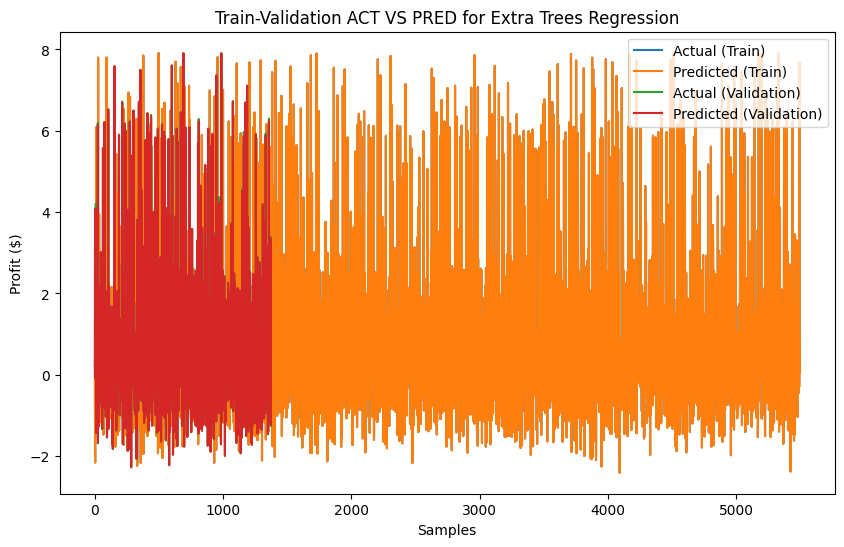

In [54]:
# Calculate the training set predictions for Extra Trees Regression
y_pred_train_et = extra_trees_regressor.predict(X_train)

# Calculate the training set mean squared error for Extra Trees Regression
mse_train_et = mean_squared_error(y_train, y_pred_train_et)

# Calculate the validation set predictions for Extra Trees Regression
y_pred_val_et = extra_trees_regressor.predict(X_val)

# Plot the train-validation loss curves for Extra Trees Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_et)), y_pred_train_et, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_et)), y_pred_val_et, label='Predicted (Validation)')
plt.xlabel('Samples')
plt.ylabel('Profit ($)')
plt.title('Train-Validation ACT VS PRED for Extra Trees Regression')
plt.legend()
plt.show()


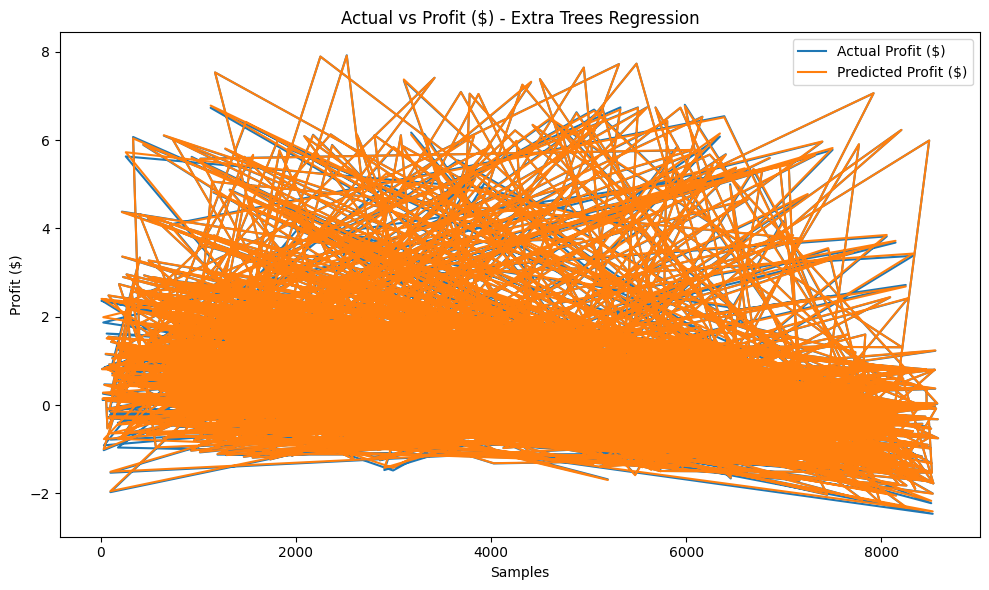

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

# Train the Extra Trees Regression model
extra_trees_regressor = ExtraTreesRegressor(n_estimators=100)  # You can adjust hyperparameters as needed
extra_trees_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_et = extra_trees_regressor.predict(X_test)

# Create a DataFrame with actual and predicted profit values
profit_comparison_et = pd.DataFrame({'Actual Profit ($)': y_test, 'Predicted Profit ($)': y_pred_et})

# Plot the actual versus predicted profit values for Extra Trees Regression
plt.figure(figsize=(10, 6))
plt.title("Actual vs Profit ($) - Extra Trees Regression")
plt.plot(profit_comparison_et.index, profit_comparison_et['Actual Profit ($)'], label='Actual Profit ($)')
plt.plot(profit_comparison_et.index, profit_comparison_et['Predicted Profit ($)'], label='Predicted Profit ($)')
plt.xlabel("Samples")
plt.ylabel("Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()


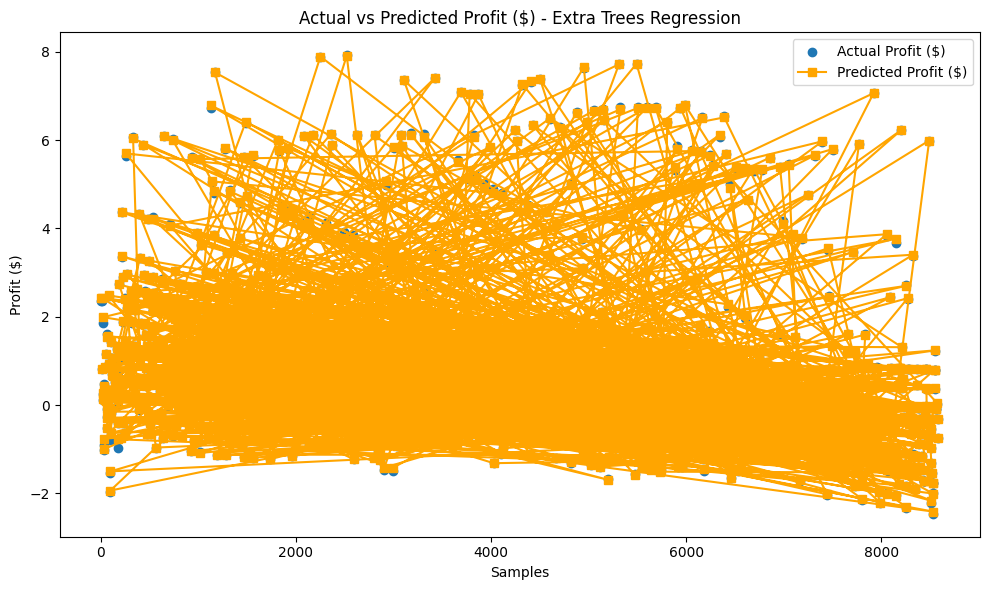

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

# Train the Extra Trees Regression model
extra_trees_regressor = ExtraTreesRegressor(n_estimators=100)  # You can adjust hyperparameters as needed
extra_trees_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_et = extra_trees_regressor.predict(X_test)

# Create a DataFrame with actual and predicted profit values
profit_comparison_et = pd.DataFrame({'Actual Profit ($)': y_test, 'Predicted Profit ($)': y_pred_et})

# Plot the actual versus predicted profit values for Extra Trees Regression
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Profit ($) - Extra Trees Regression")
plt.scatter(profit_comparison_et.index, profit_comparison_et['Actual Profit ($)'], label='Actual Profit ($)', marker='o')
plt.plot(profit_comparison_et.index, profit_comparison_et['Predicted Profit ($)'], label='Predicted Profit ($)', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()


In [57]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters for Extra Trees
et_params = {
    'n_estimators': 100,
    'max_depth': 6,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': 42
}

# Instantiate ExtraTreesRegressor
extra_trees = ExtraTreesRegressor(**et_params)

# Train the ExtraTreesRegressor model
extra_trees.fit(X_train, y_train)

# Make predictions on the test set
et_pred = extra_trees.predict(X_test)

# Evaluate the ExtraTreesRegressor model
mae_et = mean_absolute_error(y_test, et_pred)
mse_et = mean_squared_error(y_test, et_pred)
rmse_et = np.sqrt(mse_et)
r2_et = r2_score(y_test, et_pred)

# Calculate RMSLE
rmsle_mask_et = (et_pred > 0) & (y_test > 0)  # Exclude instances where either prediction or actual value is zero
rmsle_et = np.sqrt(np.mean((np.log1p(et_pred[rmsle_mask_et]) - np.log1p(y_test[rmsle_mask_et])) ** 2))

# Calculate MAPE
mape_mask_et = y_test != 0  # Exclude instances where y_test is zero
mape_et = np.mean(np.abs((y_test[mape_mask_et] - et_pred[mape_mask_et]) / y_test[mape_mask_et])) * 100

print("\nExtraTreesRegressor Model:")
print(f"Mean Absolute Error (MAE): {mae_et:.2f}")
print(f"Mean Squared Error (MSE): {mse_et:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_et:.2f}")
print(f"R-squared (R2): {r2_et:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_et:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_et:.2f}%")



ExtraTreesRegressor Model:
Mean Absolute Error (MAE): 0.17
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.23
R-squared (R2): 0.98
Root Mean Squared Logarithmic Error (RMSLE): 0.10
Mean Absolute Percentage Error (MAPE): 39.26%


**Ensemble Model**

Cross-Validation RMSE Scores: [0.03064708 0.03472932 0.02786164 0.02818913 0.024613  ]
Mean Cross-Validation RMSE: 0.029208034512896313


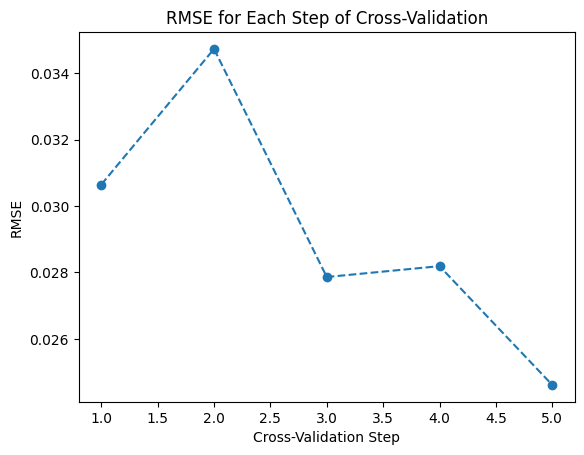

In [69]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create the individual base models
random_forest = RandomForestRegressor(n_estimators=100)
extra_trees = ExtraTreesRegressor(n_estimators=100)

# Create the ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('Random Forest', random_forest), ('Extra Trees', extra_trees)])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Perform cross-validation for RMSE
cv_scores = cross_val_score(ensemble_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [70]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create the individual base models
random_forest = RandomForestRegressor(n_estimators=100)
extra_trees = ExtraTreesRegressor(n_estimators=100)

# Create the ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('Random Forest', random_forest), ('Extra Trees', extra_trees)])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict on the test set using the ensemble model
y_pred_test_ensemble = ensemble_model.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error) for the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_test_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_test_ensemble)

# Print the evaluation metrics for the ensemble model
print("Ensemble Model (Random Forest + Extra Trees) Mean Squared Error:", mse_ensemble)
print("Ensemble Model (Random Forest + Extra Trees) Mean Absolute Error:", mae_ensemble)


Ensemble Model (Random Forest + Extra Trees) Mean Squared Error: 0.0006464029263678745
Ensemble Model (Random Forest + Extra Trees) Mean Absolute Error: 0.010789144353899903


In [71]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create the individual base models
random_forest = RandomForestRegressor(n_estimators=100)
extra_trees = ExtraTreesRegressor(n_estimators=100)

# Create the ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('Random Forest', random_forest), ('Extra Trees', extra_trees)])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict on the validation set using the ensemble model
y_pred_val_ensemble = ensemble_model.predict(X_val)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error) for the ensemble model on the validation set
mse_val_ensemble = mean_squared_error(y_val, y_pred_val_ensemble)
mae_val_ensemble = mean_absolute_error(y_val, y_pred_val_ensemble)

# Print the evaluation metrics for the ensemble model on the validation set
print("Validation Mean Squared Error (Ensemble Model - Random Forest + Extra Trees):", mse_val_ensemble)
print("Validation Mean Absolute Error (Ensemble Model - Random Forest + Extra Trees):", mae_val_ensemble)


Validation Mean Squared Error (Ensemble Model - Random Forest + Extra Trees): 0.0005921343377001429
Validation Mean Absolute Error (Ensemble Model - Random Forest + Extra Trees): 0.010379767103347837


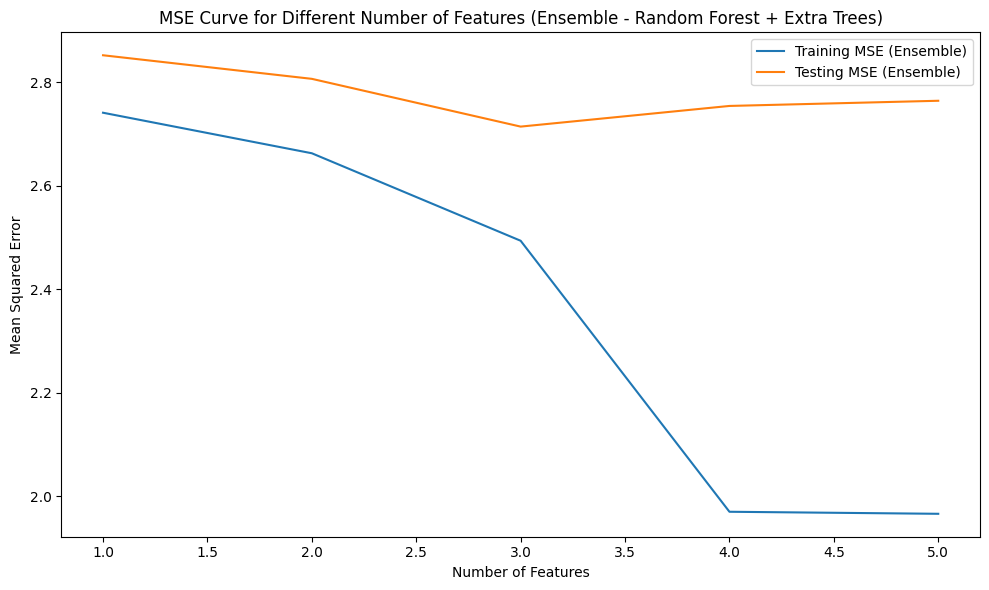

In [72]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors_ensemble = []
test_errors_ensemble = []

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create the individual base models
    random_forest = RandomForestRegressor(n_estimators=100)  # You can adjust hyperparameters as needed
    extra_trees = ExtraTreesRegressor(n_estimators=100)  # You can adjust hyperparameters as needed

    # Create the ensemble model using VotingRegressor
    ensemble_model = VotingRegressor([('Random Forest', random_forest), ('Extra Trees', extra_trees)])

    # Fit the ensemble model
    ensemble_model.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred_ensemble = ensemble_model.predict(X_train_subset)
    y_test_pred_ensemble = ensemble_model.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error_ensemble = mean_squared_error(y_train, y_train_pred_ensemble)
    test_error_ensemble = mean_squared_error(y_test, y_test_pred_ensemble)

    # Append the errors to the lists
    train_errors_ensemble.append(train_error_ensemble)
    test_errors_ensemble.append(test_error_ensemble)

# Plot the MSE curve for the ensemble model
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors_ensemble, label='Training MSE (Ensemble)')
plt.plot(num_features, test_errors_ensemble, label='Testing MSE (Ensemble)')
plt.title('MSE Curve for Different Number of Features (Ensemble - Random Forest + Extra Trees)')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


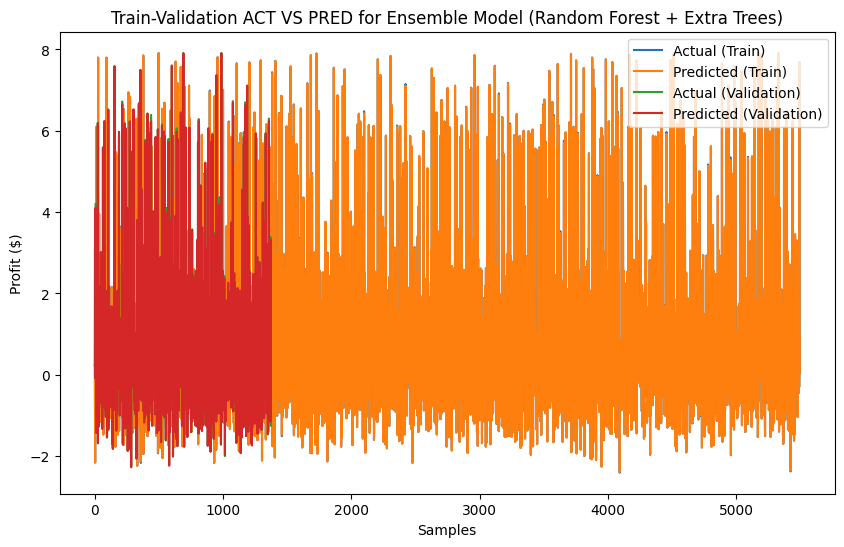

In [73]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Train the Random Forest model
random_forest_regressor = RandomForestRegressor(n_estimators=100)  # You can adjust hyperparameters as needed
random_forest_regressor.fit(X_train, y_train)

# Train the Extra Trees model
extra_trees_regressor = ExtraTreesRegressor(n_estimators=100)  # You can adjust hyperparameters as needed
extra_trees_regressor.fit(X_train, y_train)

# Create the ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('Random Forest', random_forest_regressor), ('Extra Trees', extra_trees_regressor)])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_train_ensemble = ensemble_model.predict(X_train)
y_pred_val_ensemble = ensemble_model.predict(X_val)

# Calculate the mean squared error for the ensemble model
mse_train_ensemble = mean_squared_error(y_train, y_pred_train_ensemble)
mse_val_ensemble = mean_squared_error(y_val, y_pred_val_ensemble)

# Plot the train-validation loss curves for the ensemble model
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_ensemble)), y_pred_train_ensemble, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_ensemble)), y_pred_val_ensemble, label='Predicted (Validation)')
plt.xlabel('Samples')
plt.ylabel('Profit ($)')
plt.title('Train-Validation ACT VS PRED for Ensemble Model (Random Forest + Extra Trees)')
plt.legend()
plt.show()


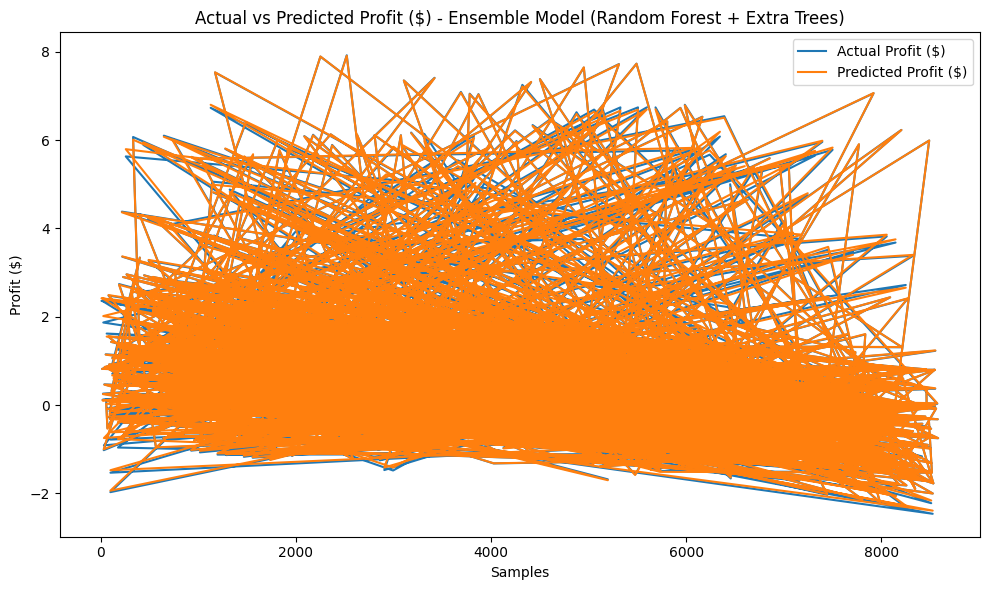

In [74]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Train the Random Forest model
random_forest_regressor = RandomForestRegressor(n_estimators=100)  # You can adjust hyperparameters as needed
random_forest_regressor.fit(X_train, y_train)

# Train the Extra Trees model
extra_trees_regressor = ExtraTreesRegressor(n_estimators=100)  # You can adjust hyperparameters as needed
extra_trees_regressor.fit(X_train, y_train)

# Create the ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('Random Forest', random_forest_regressor), ('Extra Trees', extra_trees_regressor)])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# Create a DataFrame with actual and predicted profit values for the ensemble model
profit_comparison_ensemble = pd.DataFrame({'Actual Profit ($)': y_test, 'Predicted Profit ($)': y_pred_ensemble})

# Plot the actual versus predicted profit values for the ensemble model
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Profit ($) - Ensemble Model (Random Forest + Extra Trees)")
plt.plot(profit_comparison_ensemble.index, profit_comparison_ensemble['Actual Profit ($)'], label='Actual Profit ($)')
plt.plot(profit_comparison_ensemble.index, profit_comparison_ensemble['Predicted Profit ($)'], label='Predicted Profit ($)')
plt.xlabel("Samples")
plt.ylabel("Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()


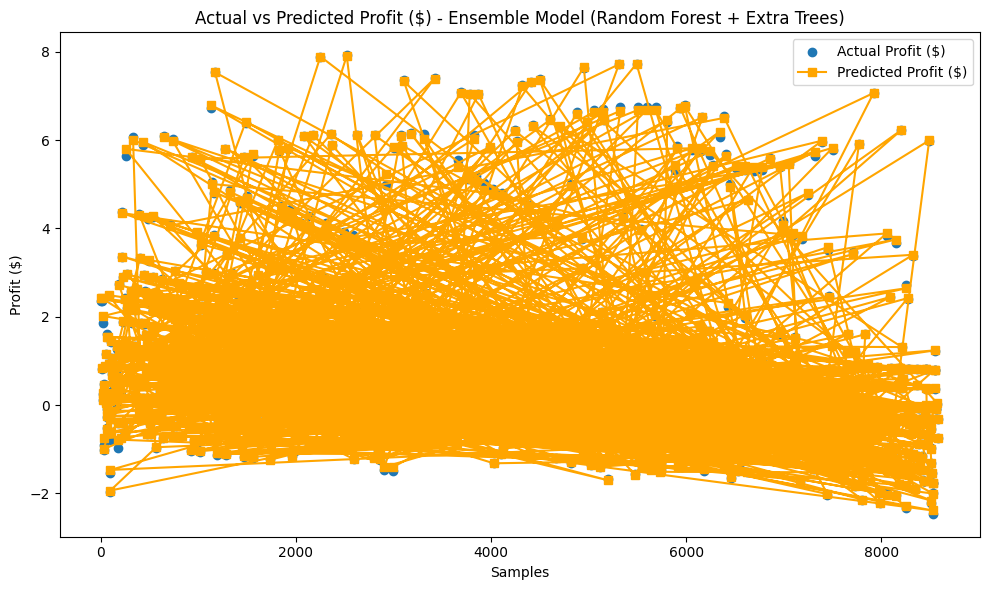

In [75]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Train the Random Forest model
random_forest_regressor = RandomForestRegressor(n_estimators=100)  # You can adjust hyperparameters as needed
random_forest_regressor.fit(X_train, y_train)

# Train the Extra Trees Regression model
extra_trees_regressor = ExtraTreesRegressor(n_estimators=100)  # You can adjust hyperparameters as needed
extra_trees_regressor.fit(X_train, y_train)

# Create the ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('Random Forest', random_forest_regressor), ('Extra Trees', extra_trees_regressor)])

# Fit the ensemble model with training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# Create a DataFrame with actual and predicted profit values for the ensemble model
profit_comparison_ensemble = pd.DataFrame({'Actual Profit ($)': y_test, 'Predicted Profit ($)': y_pred_ensemble})

# Plot the actual versus predicted profit values for the ensemble model
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Profit ($) - Ensemble Model (Random Forest + Extra Trees)")
plt.scatter(profit_comparison_ensemble.index, profit_comparison_ensemble['Actual Profit ($)'], label='Actual Profit ($)', marker='o')
plt.plot(profit_comparison_ensemble.index, profit_comparison_ensemble['Predicted Profit ($)'], label='Predicted Profit ($)', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()


In [76]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Instantiate Random Forest model
random_forest = RandomForestRegressor()

# Instantiate Extra Trees model
extra_trees = ExtraTreesRegressor()

# Create the ensemble model
ensemble_model = VotingRegressor([('Random Forest', random_forest), ('Extra Trees', extra_trees)])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
ensemble_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model
mae_ensemble = mean_absolute_error(y_test, ensemble_pred)
mse_ensemble = mean_squared_error(y_test, ensemble_pred)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y_test, ensemble_pred)

# Calculate RMSLE
rmsle_mask_ensemble = (ensemble_pred > 0) & (y_test > 0)  # Exclude instances where either prediction or actual value is zero
rmsle_ensemble = np.sqrt(np.mean((np.log1p(ensemble_pred[rmsle_mask_ensemble]) - np.log1p(y_test[rmsle_mask_ensemble])) ** 2))

# Calculate MAPE
mape_mask_ensemble = y_test != 0  # Exclude instances where y_test is zero
mape_ensemble = np.mean(np.abs((y_test[mape_mask_ensemble] - ensemble_pred[mape_mask_ensemble]) / y_test[mape_mask_ensemble])) * 100

print("\nEnsemble Model (Random Forest + Extra Trees):")
print(f"Mean Absolute Error (MAE): {mae_ensemble:.2f}")
print(f"Mean Squared Error (MSE): {mse_ensemble:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ensemble:.2f}")
print(f"R-squared (R2): {r2_ensemble:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_ensemble:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_ensemble:.2f}%")



Ensemble Model (Random Forest + Extra Trees):
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 2.77%
